In [3]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt

import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio.plot import show
from rasterio import mask
import folium

A raster consists of a series of pixels, each with the same dimensions and shape. In the case of rasters derived from airborne sensors, each pixel represents an area of space on the Earth's surface.

In [2]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

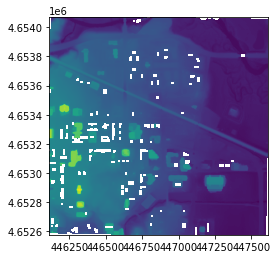

<AxesSubplot:>

In [4]:
# Read raster/tif file
# --------------------
iowa_tif = '../scripts/tif/iowa.tif'

#plt won't work because tiff is an object not an array
raster_iowa = rasterio.open(iowa_tif)
show(raster_iowa)

In [10]:
full_image = raster_iowa.read()
full_image.shape

(1, 1493, 1499)

In [13]:
num_bands = raster_iowa.count
num_bands

1

In [20]:
img_band =  raster_iowa.read(1)

#1 band 2d image

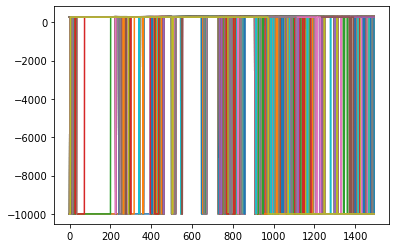

In [18]:
plt.plot(img_band)
plt.show()

In [21]:
#find out CRS
print("Co-ordinate Reference System:", raster_iowa.crs)

Co-ordinate Reference System: EPSG:26915


In [22]:
metadata = raster_iowa.meta
print("Metadata: {metadata}\n".format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 1499, 'height': 1493, 'count': 1, 'crs': CRS.from_epsg(26915), 'transform': Affine(1.0, 0.0, 446112.3908587211,
       0.0, -1.0, 4654068.192733061)}



In [25]:
desc = raster_iowa.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('idw',)



In [26]:
#geo-transform
print("Geotransform:",raster_iowa.transform)

Geotransform: | 1.00, 0.00, 446112.39|
| 0.00,-1.00, 4654068.19|
| 0.00, 0.00, 1.00|


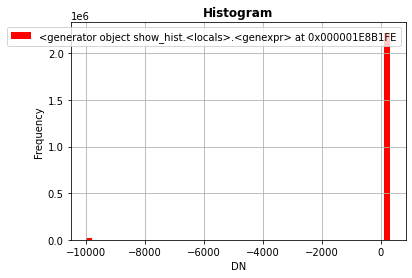

In [27]:
rasterio.plot.show_hist(full_image,bins=50,histtype='stepfilled',lw=0.0,stacked=False)

In [5]:
iowa_data = raster_iowa.read()
type(iowa_data)

numpy.ndarray

In [6]:
count = iowa_data[iowa_data > 0].sum()
count

623568522.8765813

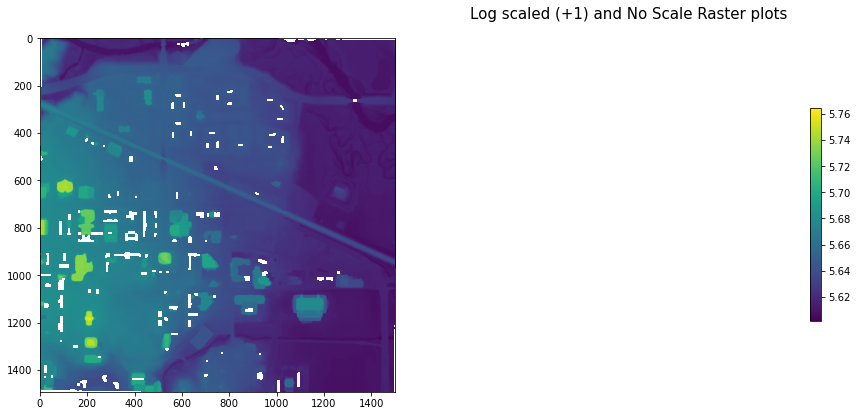

In [7]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(iowa_data, title)

In [8]:
# get shp from tif
from glob import glob
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    print('Saved..')